In [1]:
import pandas as pd



In [2]:
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")


In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2168,ham,Thx. All will be well in a few months,NaN,NaN,NaN
4628,ham,Only saturday and sunday holiday so its very d...,NaN,NaN,NaN
2207,ham,Usually the body takes care of it buy making s...,NaN,NaN,NaN
3568,ham,She's fine. Sends her greetings,NaN,NaN,NaN
5122,ham,\NOT ENUFCREDEIT TOCALL.SHALL ILEAVE UNI AT 6 ...,NaN,NaN,NaN
4061,ham,Hi dear we saw dear. We both are happy. Where ...,NaN,NaN,NaN
2898,ham,"Aight, I should be there by 8 at the latest, p...",NaN,NaN,NaN
4778,ham,O we cant see if we can join denis and mina? O...,NaN,NaN,NaN
1301,ham,I tot u reach liao. He said t-shirt.,NaN,NaN,NaN
5390,ham,Nt joking seriously i told,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns because of null values
df = df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.sample(10)

,v1,v2
689,spam,<Forwarded from 448712404000>Please CALL 08712...
598,ham,Will do. Was exhausted on train this morning. ...
5090,ham,"St andre, virgil's cream"
3199,ham,Just curious because my cuz asked what I was u...
1225,ham,"sir, you will receive the account no another 1..."
2620,ham,How come?
2748,ham,Send his number and give reply tomorrow mornin...
4419,ham,Ok i msg u b4 i leave my house.
3095,ham,We walked from my moms. Right on stagwood pass...
730,spam,Email AlertFrom: Jeri StewartSize: 2KBSubject:...


In [9]:
# renaming columns
df = df.rename(columns = {'v1':'target','v2':'text'})

In [10]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


* Label Encoder is a technique used in machine learning to convert categorical data (textual data like names, labels, categories, etc.) into numerical data that algorithms can process. It assigns a unique numerical value to each category, which helps the machine learning model to interpret and analyze the data. For example, if you have a categorical variable "color" with values "red", "green", and "blue", a label encoder would convert these values to 0, 1, and 2, respectively. This makes it easier for the machine learning model to understand the data and make accurate predictions. 

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep = 'first')

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.duplicated().sum()

0

In [19]:
df.shape


(5169, 2)

## EDA(exploratory data analysis)

* Exploratory data analysis (EDA) is the process of examining and analyzing data to get a better understanding of its characteristics and patterns. It involves looking at the data from different angles, summarizing its main features, and identifying any trends, anomalies, or relationships that may exist.

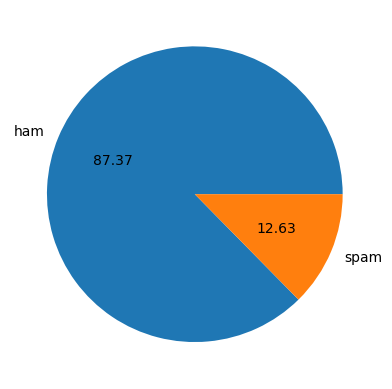

In [20]:
## autopct is used to show percentage
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels= ['ham','spam'],autopct="%0.2f");

# data is imbalanced because ham value is much greater than spam value

* now we will make 3 columns
*   1st column will be number of character in sms
*   2nd column will be number of words in sms
*   3rd column will be sentences in sms


In [21]:
import nltk

In [22]:
!pip install nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

NLTK (Natural Language Toolkit) is a popular Python library that provides tools and resources for working with human language data. It offers a wide range of functionalities for tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, parsing, sentiment analysis, machine learning, and more.

Some common uses of NLTK include:

Text cleaning and preprocessing: NLTK can be used to clean and preprocess text data by removing unwanted characters, converting text to lowercase, removing stop words, and more.

Text classification: NLTK provides tools for building and evaluating text classifiers that can be used to automatically categorize text into different classes.

Sentiment analysis: NLTK includes tools for performing sentiment analysis, which involves identifying the emotional tone of a piece of text, such as whether it is positive, negative, or neutral.

Named entity recognition: NLTK can be used to identify named entities in text data, such as people, places, and organizations.

Machine learning: NLTK includes machine learning algorithms and tools that can be used to build and train models for various natural language processing tasks.

Overall, NLTK is a versatile and powerful library that can be used for a wide range of natural language processing tasks, making it a valuable tool for researchers, data scientists, and developers working with text data.

In [22]:
df['num_characters'] = df['text'].apply(len)

C:\Users\Asus\AppData\Local\Temp\ipykernel_7592\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [23]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [24]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Asus\AppData\Local\Temp\ipykernel_7592\76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [25]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Asus\AppData\Local\Temp\ipykernel_7592\754723001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [26]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
import seaborn as sns


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

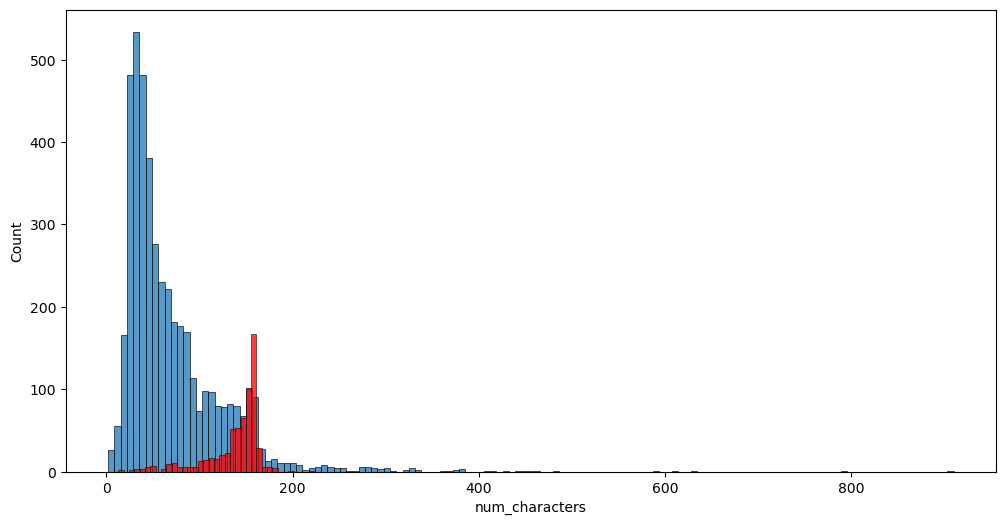

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
#as we can see that in spam number of characters are generally more

<AxesSubplot:xlabel='num_words', ylabel='Count'>

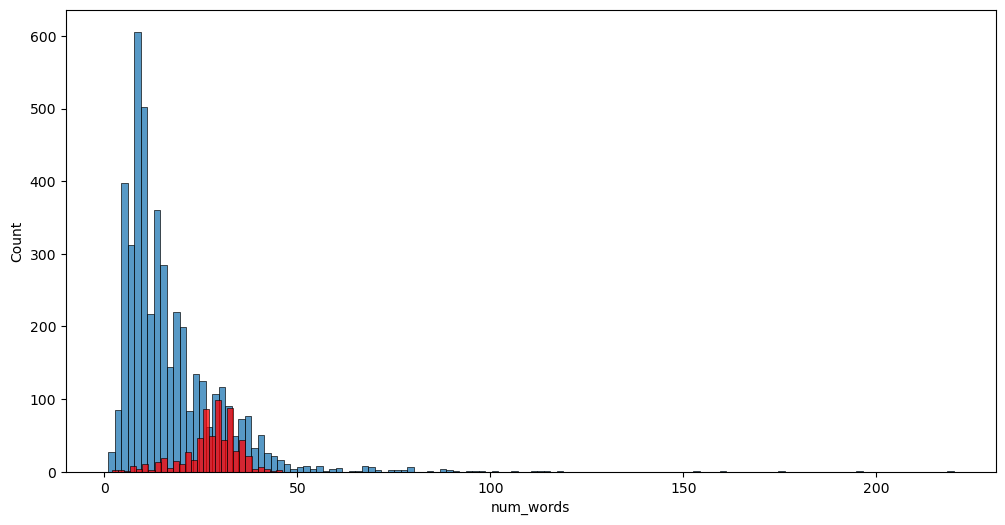

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

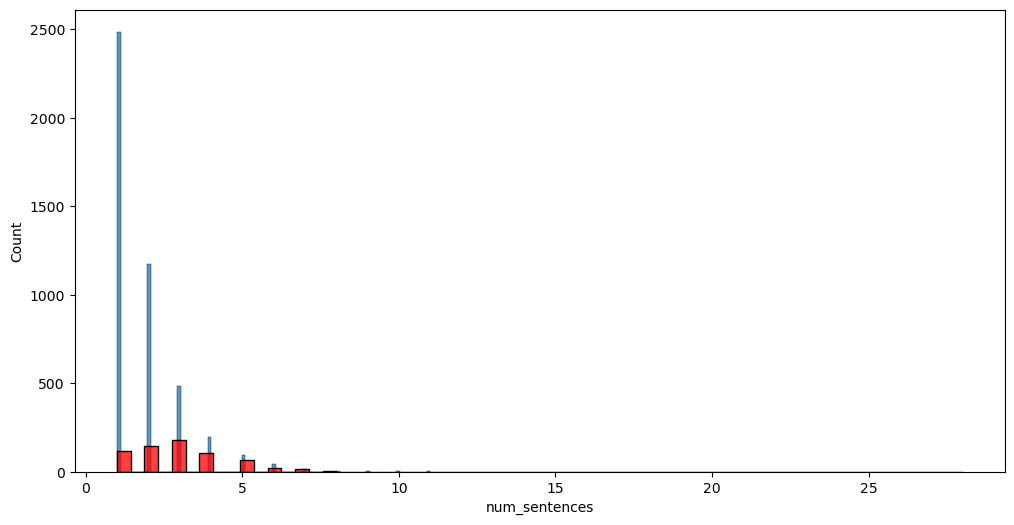

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

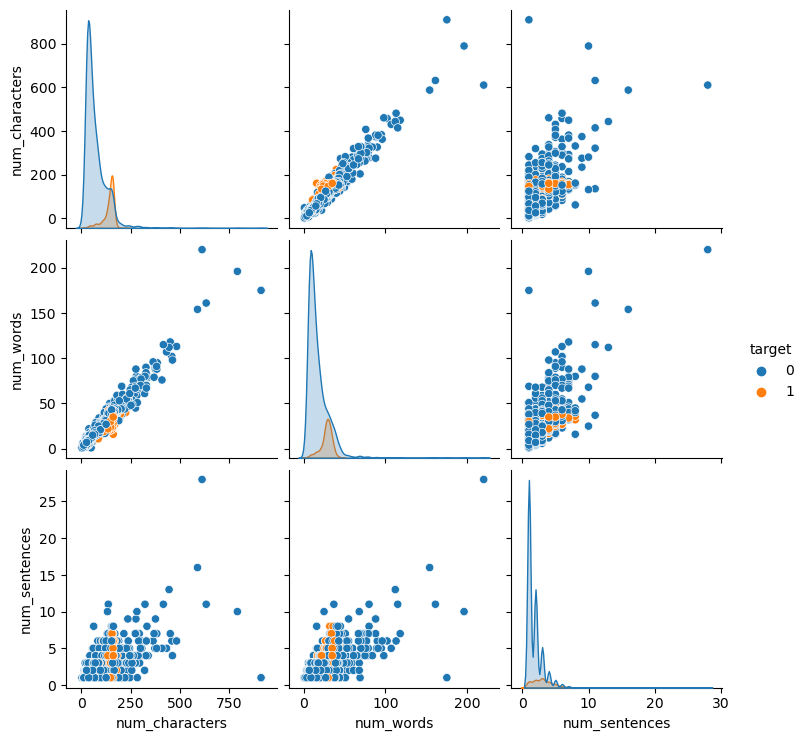

In [34]:
sns.pairplot(df,hue='target')

# as we can see that we have outliers which can damage our data analysis

<AxesSubplot:>

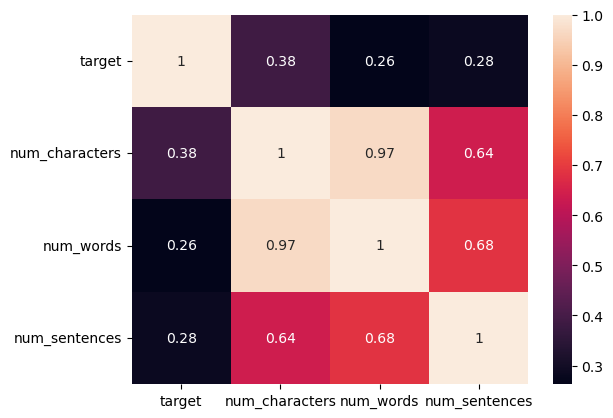

In [35]:
sns.heatmap(df.corr(),annot=True)

* from above correlation function we can see that if we have to take only one columns then will take num characters because it have strong corelation with num words,num sentence as well as target

## Data Preprocessing
* lower case
* tokenization
* removing speacial characters
* removing stop words and puncuation
* stemming


* Tokenization is a process in machine learning and natural language processing (NLP) that involves breaking up text into smaller units called tokens. Tokens can be words, phrases, or other meaningful units of text. The purpose of tokenization is to prepare text data for further processing, analysis, and modeling.

* Stop words are words that are considered to have little or no significant meaning in a given language and are thus unlikely to be useful in processing and analyzing text data. Examples of stop words in English include "the", "and", "a", "an", "in", "to", "for", "of", and so on.
* By removing stop words, the processing of text data can become more efficient and effective because there are fewer words to analyze and process. This can also help in reducing the dimensionality of the feature space and improve the performance of machine learning models.

* Stemming is a technique used in machine learning to simplify words by reducing them to their root form. It involves removing prefixes and suffixes from words, so that similar words with different endings are treated as the same word. For example, "running", "runner", and "runs" would all be reduced to "run". This helps to make it easier to analyze text data and identify patterns. Stemming is commonly used in applications like search engines, spam filters, and text analysis tools.

* Stemming algorithms use various techniques to identify and remove affixes from words, such as Porter stemming, Lancaster stemming, and Snowball stemming


In [36]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
def transform_text(text):
    #converts into lower cases
    text  = text.lower()
    #breaks into words`
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        #if the text contains any special character it will get removed
        # check if it alpha-numeric then it will get added in the list
        if i.isalnum():
            y.append(i)
        text = y[:]
        y.clear()
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
            
        text = y[:]
        y.clear()
        for i in text:
            y.append(ps.stem(i))
        
        # return in form of string
    return " ".join(y)

In [47]:
from nltk.corpus import stopwords
transform_text('hi how are you Ali the great loves learning machine learning !')


'hi ali great love learn machin learn'

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('running')

'run'

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Asus\AppData\Local\Temp\ipykernel_7592\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
#word cloud will show most important words in a big view
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color = 'white')


In [51]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))


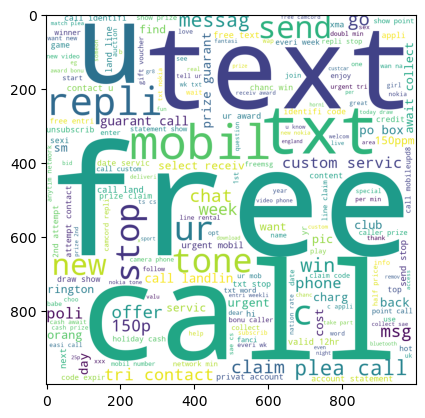

In [52]:
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

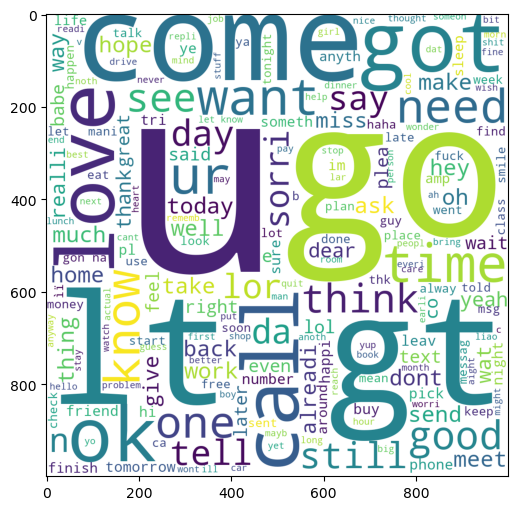

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [55]:
#now convert spam words into a list
# so we have to write custom words
#we have to split sentences into words
spam_corpus=[]
#converts sentences into list 
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [56]:
#it means there are 9930 sppam words 
len(spam_corpus)

9930

In [57]:
#now it will convert words into dictionary and how many times that words is used

from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

C:\Users\Asus\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


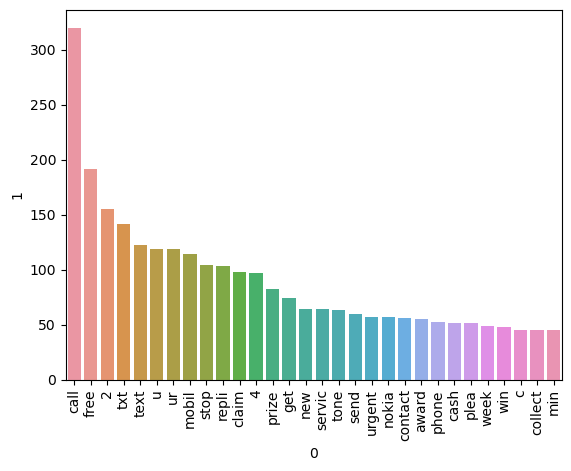

In [58]:
#now take 30 most common words
from collections import Counter 
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation= 'vertical');

In [59]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
        
    

In [60]:
len(ham_corpus)

35286

C:\Users\Asus\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


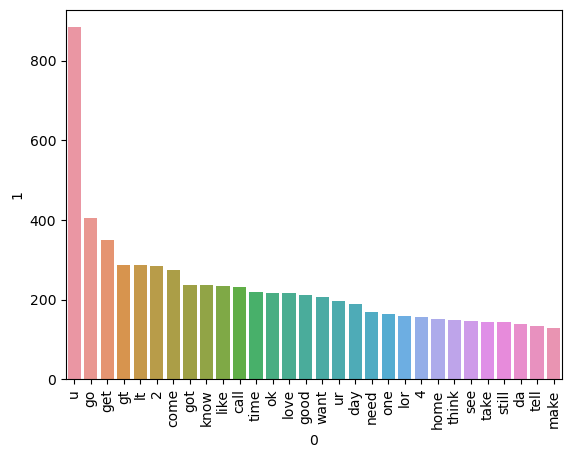

In [61]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical');

#for text data naiye bayes algorithm works best
* The Naive Bayes algorithm is a method for predicting the likelihood of an event happening based on certain factors. It's called "naive" because it assumes that each factor is independent of all the others, which isn't always true in real life, but simplifies the calculations.

* For example, let's say you want to predict if a given email is spam or not based on its content. You could use Naive Bayes by analyzing the words in the email and comparing them to a training set of known spam and non-spam emails.

* The algorithm would calculate the probability of each word appearing in spam and non-spam emails, and then use those probabilities to predict the likelihood of the new email being spam or not.

* Overall, Naive Bayes is a simple and effective way to classify data, and it's commonly used in fields like natural language processing, sentiment analysis, and email filtering.

## Model Building

* Feature extraction is a part of the dimensionality reduction process
* Feature extraction is a process of selecting and identifying important and relevant information from raw data. This information, called "features," represents the key characteristics of the data that are most useful for a particular task or analysis.

* For example, if you have a large dataset of images, feature extraction may involve identifying the edges, textures, shapes, and colors that are most relevant for classifying the images into different categories. These features could be used as inputs for a machine learning algorithm, which would learn to recognize patterns and make predictions based on the extracted features.

* Overall, feature extraction is an important step in many data analysis and machine learning tasks, as it helps to reduce the complexity of the data and highlight the most important information for a given problem.

In [62]:
#first we have used countvectorizer now we are using tfidf
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

* Both CountVectorizer and TfidfVectorizer are techniques used in natural language processing to convert textual data into a numerical representation that can be used for further analysis.

* CountVectorizer simply counts the frequency of each word in a given text corpus and creates a vector of word counts for each document in the corpus. So, for each document, the resulting vector will have a value for each word in the vocabulary, indicating the number of times that word appears in the document.

* On the other hand, TfidfVectorizer not only counts the frequency of words but also takes into account the importance of each word in the corpus. It assigns a weight to each word based on how frequently it appears in the corpus and how important it is for distinguishing between different documents. This weight is known as the "term frequency-inverse document frequency" (tf-idf) score, and it helps to give more importance to less frequent but more meaningful words in the text.

* So, the main difference between CountVectorizer and TfidfVectorizer is that CountVectorizer simply counts the frequency of each word in a document, while TfidfVectorizer assigns a weight to each word based on how important it is in the corpus as a whole. TfidfVectorizer is generally preferred over CountVectorizer when the text corpus is large and diverse, as it helps to give more importance to meaningful and rare words, while still discounting common and less informative words.

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
x.shape

(5169, 6672)

In [66]:
y = df['target'].values

In [67]:
from sklearn.model_selection import train_test_split

* randomstate is basically used for reproducing your problem the same every time it is run. If you do not use a randomstate in traintestsplit, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue.

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


All of these are types of Naive Bayes classifiers, a type of algorithm used in machine learning for classification tasks.

Gaussian Naive Bayes:
This type of Naive Bayes assumes that the data follows a Gaussian or normal distribution. It is typically used when the features (input variables) are continuous, and the class (output variable) is categorical. For example, it could be used to classify whether an email is spam or not based on the length of the email, number of links, etc.

Multinomial Naive Bayes:
This type of Naive Bayes assumes that the data follows a multinomial distribution. It is typically used when the features are discrete and countable, such as the frequency of words in a document. It is often used in natural language processing (NLP) tasks, such as sentiment analysis or text classification.

Bernoulli Naive Bayes:
This type of Naive Bayes assumes that the data follows a Bernoulli distribution. It is also typically used when the features are discrete and binary, such as the presence or absence of a word in a document. It is often used in NLP tasks as well.

In summary, Gaussian Naive Bayes is used for continuous data, Multinomial Naive Bayes is used for discrete countable data, and Bernoulli Naive Bayes is used for binary data.

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [71]:
# here multinomial nayes bayes works better because precision more matters
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [72]:
# because data is imbalanced so accuracy less matters than precision
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


# support vector machine:
SVMs are a way to separate data into two groups using a margin and support vectors, and they can work even when the data is not easily separable.
Imagine you have a set of data points on a graph, and you want to draw a line that separates them into two groups. There could be many different lines that could do this, but the best line is the one that maximizes the distance between the two groups. This is called the "margin."

The support vectors are the points that are closest to the margin on either side. These points help determine the location of the margin and the line that separates the data.
# Decision Tree:
A decision tree classifier is a type of algorithm used in machine learning that helps to classify data into different categories based on a series of questions or decisions.

Think of it like a flowchart where each node represents a question or test on a certain feature, and the branches represent the possible answers or outcomes. The tree continues to grow until it reaches a point where it can no longer split the data any further.

For example, let's say we're trying to classify animals into either cats or dogs based on their characteristics. We could start with a question like "Does the animal have fur?" If the answer is yes, we would follow the "yes" branch and ask another question like "Is the fur color brown?" If the answer is no, we would follow the "no" branch and ask another question like "Is the animal's tail long?"



In [73]:
# conda install -c anaconda py-xgboost

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost

In [75]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
svc = SVC(kernel = 'sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [77]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [78]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [ ]:
#test the function
train_classifier(svc,x_train,y_train,x_test,y_test)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,y_train,x_test,y_test)
    print('for',name)
    print('Accuracy',current_accuracy)
    print('Precision',current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

In [ ]:
performance_df = pd.DataFrame({'algorithm':clfs.keys(),'accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df,id_vars = 'algorithm')

In [ ]:
performance_df1

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))